In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import LSTM
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D, Dense, Flatten, Input, LSTM, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

# CSV 파일 로드
df = pd.read_csv('abalone.csv')

# 데이터 정보 확인
df.info()

# 기본 통계량 확인
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,1205.940366,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [2]:
# 결측치 확인
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [3]:
# 결측치 제거, 확인
df = df.dropna()
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

Text(0.5, 1.0, 'Label')

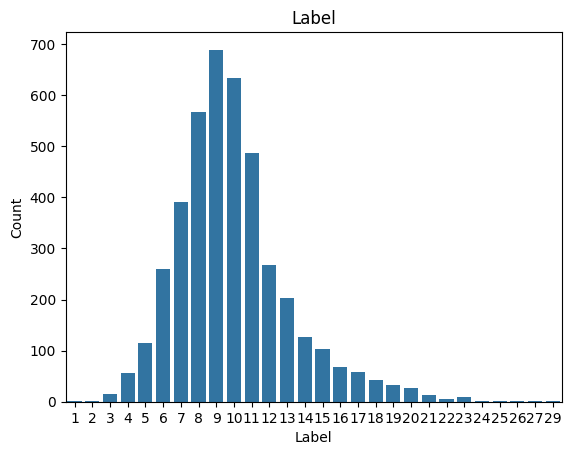

In [4]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label")

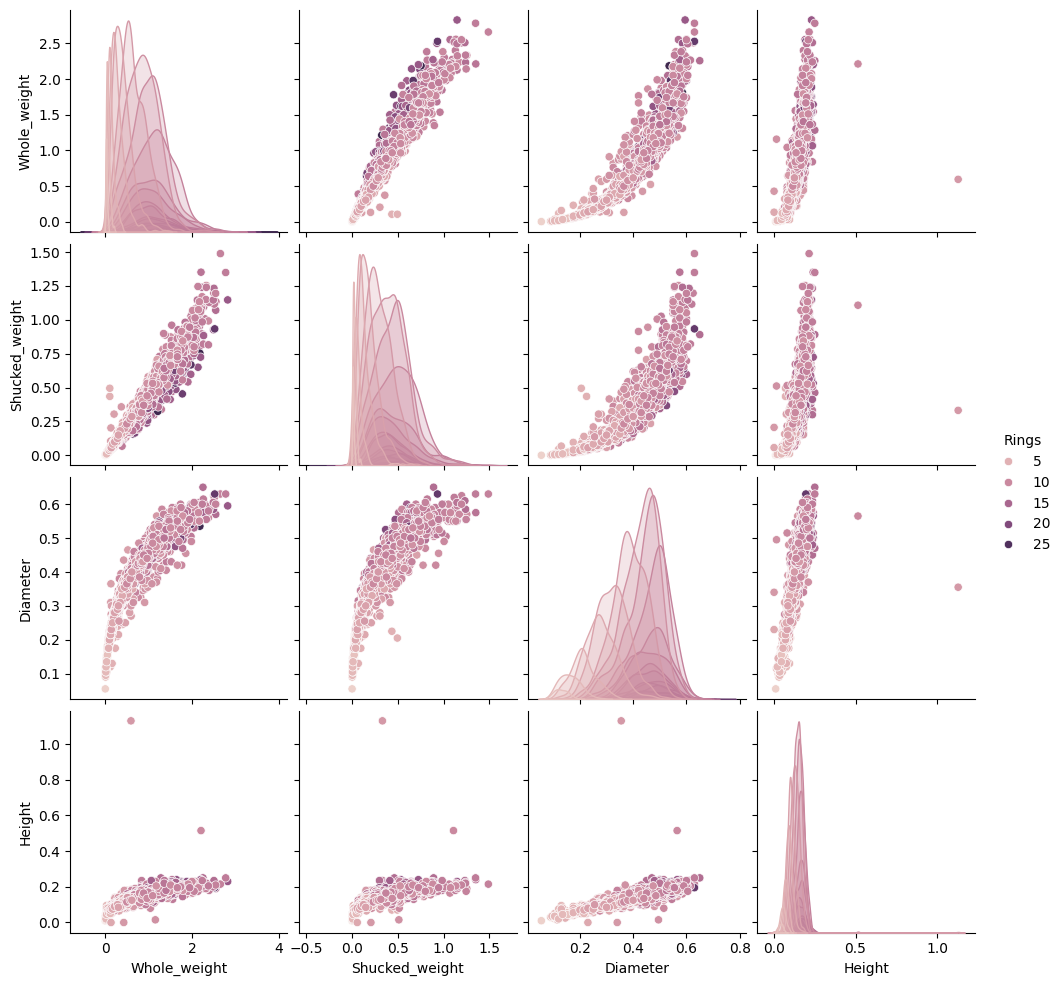

In [5]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Whole_weight', 'Shucked_weight', 'Diameter', 'Height'],
            hue ='Rings')
plt.show()

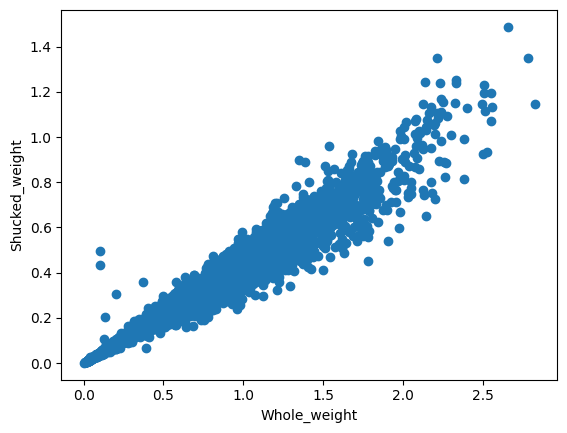

In [6]:
# 산점도 확인

plt.scatter(df['Whole_weight'], df['Shucked_weight'])
plt.xlabel('Whole_weight')
plt.ylabel('Shucked_weight')

plt.show()

C:\Users\calix\AppData\Local\Temp\ipykernel_32072\1191235279.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Whole_weight'], kde = True, hist = False, ax=ax1)
C:\Users\calix\AppData\Local\Temp\ipykernel_32072\1191235279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Shu

<Axes: xlabel='Shucked_weight', ylabel='Density'>

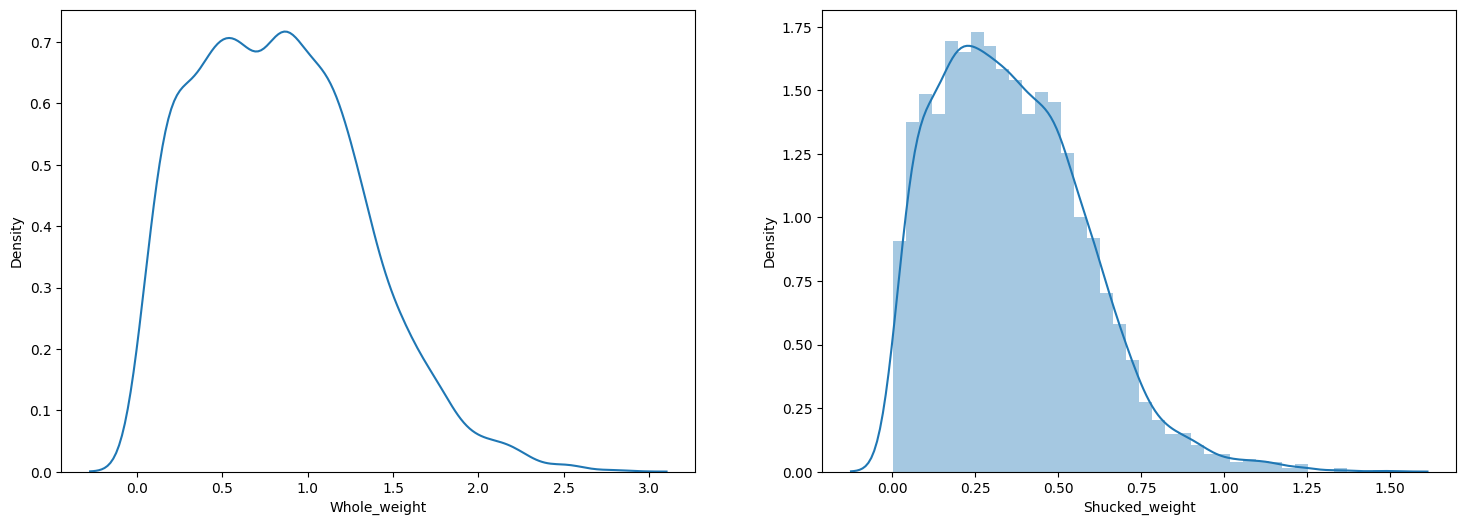

In [7]:
figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Whole_weight'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Shucked_weight'], ax=ax2)

In [8]:
X=df.drop('Rings',axis=1)
X.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [9]:
y=df['Rings']
y.value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

In [10]:
# 원 핫 인코딩(문자열의 경우)후 train/test 분할

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=0) 

# random_state는 0일 때 매번 같은 세트, 임의의 정수는 무작위 시드로 분할함

In [11]:
# split_sequence 정의

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        # 시퀀스 끝을 넘어가면 중단
        if end_ix > len(sequence) - 1:
            break
        # 입력 시퀀스와 출력 시퀀스 분리
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# 데이터 분할
X, y = split_sequence(X, 3)

KeyError: 3

In [51]:
from keras.layers import LSTM

def create_cnn_lstm_model(input_shape, output_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        LSTM(50, activation='relu'),
        Dense(64, activation='relu'),
        Dense(output_shape, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# 모델 학습

input_shape = (100, 1)  # n_steps=100, n_features=1
output_shape = 1  # 이진 분류이므로 1

# 모델 생성
model = create_cnn_lstm_model(input_shape, output_shape)

# 모델 요약 정보 출력
model.summary()

# 데이터 준비 후 모델 학습
# model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))
